<a href="https://colab.research.google.com/github/de-pesh/ML/blob/main/Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from skimage.segmentation import slic
from skimage.color import label2rgb
import cv2

In [2]:
# Load and Preprocess Image (with Original Size)
def load_and_preprocess_image(image_path):
    img = load_img(image_path)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess image for VGG16
    return img_array, img.size

In [3]:
# Mounting drive for Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# Loading an image for segmentation
image_path = '/content/drive/My Drive/shapes.png'
img = load_and_preprocess_image(image_path)

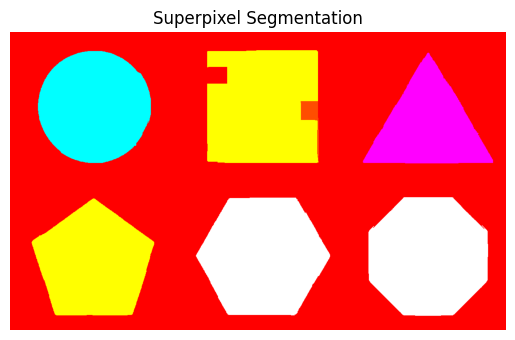

In [20]:
# Apply Superpixel Segmentation
superpixels = slic(img[0][0], n_segments=500, compactness=10) # Access the first image in the batch
plt.imshow(label2rgb(superpixels, img[0][0], kind='avg')) # Access the first image in the batch
plt.title("Superpixel Segmentation")
plt.axis('off')
plt.show()

In [21]:
# Apply K-Means Clustering (with more clusters)
kmeans = KMeans(n_clusters=8, random_state=42)

# Assuming 'img' is your original image data
features = img[0][0] # Access the first image in the batch and remove the batch dimension

# Reshape features for KMeans
features_reshaped = features.reshape(features.shape[0] * features.shape[1], -1)

kmeans.fit(features_reshaped)
cluster_labels = kmeans.predict(features_reshaped)
segmented_image = cluster_labels.reshape(features.shape[0], features.shape[1]) # Reshape to original image dimensions

In [22]:
# Apply Morphological Operations for Refinement
kernel = np.ones((5, 5), np.uint8)
refined_segment = cv2.morphologyEx(segmented_image.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

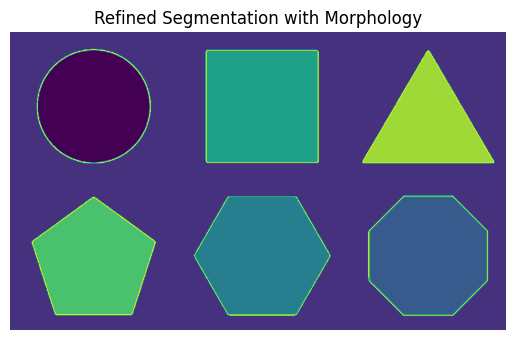

In [23]:
# Visualize the Refined Segmented Image
plt.imshow(refined_segment)
plt.title("Refined Segmentation with Morphology")
plt.axis('off')
plt.show()